In [271]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json
import os
import sys
import datetime
import pandas as pd
import pickle
import re
import matplotlib.ticker as mtick
import matplotlib as mpl
from datetime import datetime
import time
import pickle as pkl

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

In [222]:
rootdir =data_path + '/real/twitter/2017'
all_tweets = []
for subdir, dirs, files in os.walk(rootdir):
    print(subdir)
    for file in files:
        if file == "all_twits.json":
            tweets = json.loads(open(subdir+"/"+file, "r").read())
            all_tweets += tweets

/q/storage/alogins/fcla_data/real/twitter/2017
/q/storage/alogins/fcla_data/real/twitter/2017/06
/q/storage/alogins/fcla_data/real/twitter/2017/06/09
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/09
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/02
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/18
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/16
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/22
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/10
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/23
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/03
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/20
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/00
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/07
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/06
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/15
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/17
/q/storage/alogins/fcla_data/real/twitter/2017/06/09/13
/q/storage

In [223]:
rootdir =data_path + '/real/twitter/05_month'
for subdir, dirs, files in os.walk(rootdir):
    print(subdir)
    for file in files:
        if file == "all_twits.json":
            tweets = json.loads(open(subdir+"/"+file, "r").read())
            all_tweets += tweets

/q/storage/alogins/fcla_data/real/twitter/05_month
/q/storage/alogins/fcla_data/real/twitter/05_month/2017
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/09
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/02
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/18
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/16
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/22
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/10
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/23
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/03
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/20
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/00
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/05/09/07
/q/storage/alogins/fcla_data/real/twitter/05_month/2017/0

In [224]:
rootdir =data_path + '/real/twitter/04_month'
for subdir, dirs, files in os.walk(rootdir):
    print(subdir)
    for file in files:
        if file == "all_twits.json":
            tweets = json.loads(open(subdir+"/"+file, "r").read())
            all_tweets += tweets

/q/storage/alogins/fcla_data/real/twitter/04_month
/q/storage/alogins/fcla_data/real/twitter/04_month/2017
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/09
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/02
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/18
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/16
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/22
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/10
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/23
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/03
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/20
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/00
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/04/09/07
/q/storage/alogins/fcla_data/real/twitter/04_month/2017/0

In [225]:
len(all_tweets)

449252

In [226]:
all_tweets_format = []
for tweet in all_tweets:
    if (tweet['coordinates']['type'] == "Point"):
        dt = datetime.strptime(tweet['time'], "%a %b %d %H:%M:%S %z %Y")
        dt_unix = time.mktime(dt.timetuple())
        all_tweets_format.append([tweet['user_id'],
                                  dt_unix,
                                  tweet['coordinates']['coordinates'][0],
                                  tweet['coordinates']['coordinates'][1]])

In [227]:
df = pd.DataFrame(all_tweets_format,columns=["user_id", "time", "lon", "lat"])

In [228]:
df.head()

,user_id,time,lon,lat
0,741248577595277317,1.496444e+09,106.839000,-6.217300
1,4422331277,1.496444e+09,-64.000000,-32.000000
2,25427496,1.496444e+09,-84.551152,33.774250
3,60757372,1.496444e+09,-42.756450,-5.065391
4,199324673,1.496444e+09,-76.602887,39.304016


In [229]:
df.to_pickle(data_path + "/real/twitter/all_tweets_df.pkl")

In [230]:
timesliced_user_tweets = df.loc[df.groupby("user_id")["time"].idxmax()]
len(timesliced_user_tweets)

265564

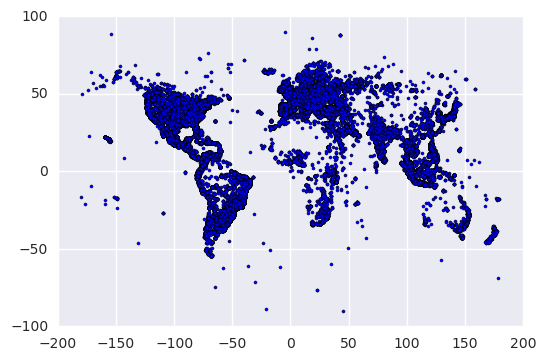

In [231]:
plt.scatter(timesliced_user_tweets['lon'],timesliced_user_tweets['lat'],marker='.')

In [232]:
timesliced_user_tweets = timesliced_user_tweets.reset_index()

In [233]:
from sklearn import cluster

db = cluster.DBSCAN(eps=0.05, n_jobs=-1).fit(timesliced_user_tweets[['lon','lat']])
labels = db.labels_

In [234]:
labels = pd.Series(labels)
labels.value_counts().head()

-1      36143
 17     10129
 238     7148
 0       6478
 23      6355
dtype: int64

In [235]:
clustered_tweets = timesliced_user_tweets.loc[labels[labels == pd.Series(labels).value_counts().index[3]].index]
clustered_tweets.head()

,index,user_id,time,lon,lat
0,300969,418,1.493469e+09,-73.980429,40.727254
4,324365,1775,1.492114e+09,-74.482890,40.798080
15,353920,4490,1.492615e+09,-73.867693,40.771653
31,123582,10343,1.496919e+09,-73.988855,40.862737
44,131928,12916,1.498070e+09,-74.012933,40.711711


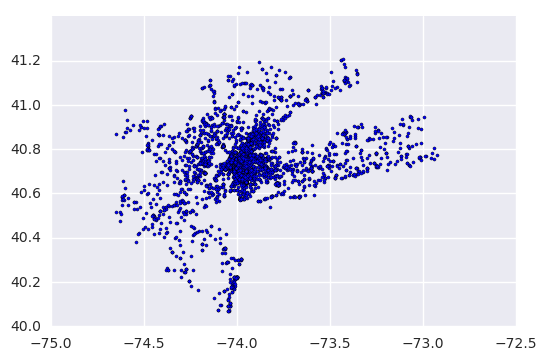

In [236]:
plt.scatter(clustered_tweets['lon'],clustered_tweets['lat'],marker='.')

# Get Restaurants

In [247]:
business = pd.read_json(data_path+"/real/yelp/dataset/business.json", lines=True)
len(business)

174567

In [248]:
business1 = business[business['hours'] != {}]
len(business1)

129260

In [249]:
allowedCat = ['Food',"Restaurants"]
def setInSet(set1, set2):
    for s in set1:
        if s in set2:
            return True
    return False

In [251]:
business2 = business1[business1['categories'].apply(lambda cat: setInSet(cat,allowedCat))]
len(business2)

50167

# Get Coordinates of Cities

In [252]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [260]:
city_bbox = {}
not_found = []

In [267]:
for row in tqdm(business2.iterrows()):
    cityname = row[1]['city']
    if cityname not in city_bbox and cityname not in not_found:
        location = geolocator.geocode(cityname)
        if location == None:
            not_found.append(location)
            continue
        bbox = location.raw['boundingbox']
        city_bbox[cityname] = (float(bbox[0]), float(bbox[1]), float(bbox[2]), float(bbox[3]))

50167it [00:52, 953.41it/s]


In [268]:
len(city_bbox) #(45.3494402, 45.5418375, 10.8771033, 11.1239)

684

In [274]:
pkl.dump(city_bbox, open(data_path+"/real/us_city_bboxes.pkl", 'wb'))

In [277]:
for k in city_bbox:
    print(city_bbox[k], k)
    break

(39.3607145, 39.7221284, -76.2329069, -75.7666386) Cecil


In [322]:
bbox = geolocator.geocode(cityname).raw['boundingbox']
city_bbox1 = {'Copenhagen': (float(bbox[0]), float(bbox[1]), float(bbox[2]), float(bbox[3]))}

In [325]:
a = 0
for i in tqdm(range(len(timesliced_user_tweets))):
    lon = timesliced_user_tweets['lon'].loc[i]
    lat = timesliced_user_tweets['lat'].loc[i]
    if getCity(lon, lat) != None:
        a += 1
a

100%|██████████| 265564/265564 [00:40<00:00, 6485.96it/s]


67


# Collect together

In [324]:
def getCity(lon, lat):
    for city in city_bbox1:
        bbox = city_bbox1[city]
        if lat <= bbox[1] and lat >= bbox[0] and lon <= bbox[3] and lon >= bbox[2]:
            return city
    return None

In [296]:
cities = []
for i in tqdm(range(len(timesliced_user_tweets))):
    lon = timesliced_user_tweets['lon'].loc[i]
    lat = timesliced_user_tweets['lat'].loc[i]
    cities.append(getCity(lon, lat))
timesliced_user_tweets['city'] = pd.Series(cities)

100%|██████████| 265564/265564 [01:49<00:00, 2426.13it/s]


In [303]:
city_stats = timesliced_user_tweets['city'].value_counts()

In [302]:
business2[business2['city'] == 'Orange'].count()

address         1
attributes      1
business_id     1
categories      1
city            1
hours           1
is_open         1
latitude        1
longitude       1
name            1
neighborhood    1
postal_code     1
review_count    1
stars           1
state           1
dtype: int64

In [310]:
city_stats = pd.DataFrame(city_stats)
city_stats = city_stats.reset_index()

In [316]:
city_stats['places'] = city_stats['index'].apply(lambda city: len(business2[business2['city'] == city]))

In [318]:
best_cities = city_stats[city_stats['city']>100][city_stats['places']>100]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [319]:
best_cities

,index,city,places
10,Phoenix,474,3322
12,Montreal,365,122
13,Charlotte,325,2410
16,Cleveland,277,1199
18,Kent,247,101
19,Pittsburgh,214,2180
22,Edinburgh,138,1575
24,Tempe,102,938
